In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [33]:
import nltk
from nltk.corpus import stopwords

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
train_df = pd.read_csv(r"F:\PFW_CS_Course\Semester 2\dual-stage-toxic-comment-detection-system\raw_data\jigsaw-toxic-comment-classification-challenge\train\train.csv")
test_df = pd.read_csv(r"F:\PFW_CS_Course\Semester 2\dual-stage-toxic-comment-detection-system\raw_data\jigsaw-toxic-comment-classification-challenge\test\test.csv")

In [12]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
sum_labels=train_df.iloc[:,2:].sum()
print(sum_labels)

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
Label            143346
dtype: int64


In [14]:
row_sum=train_df.iloc[:,2:].sum(axis=1)
train_df['Label']=(row_sum==0)

In [15]:
print(train_df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Label            0
dtype: int64


In [16]:
print(test_df.isnull().sum())

id              0
comment_text    0
dtype: int64


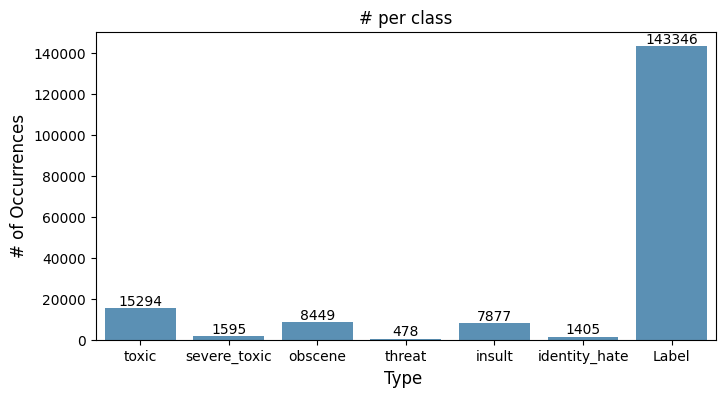

In [23]:
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=sum_labels.index, y=sum_labels.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = sum_labels.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

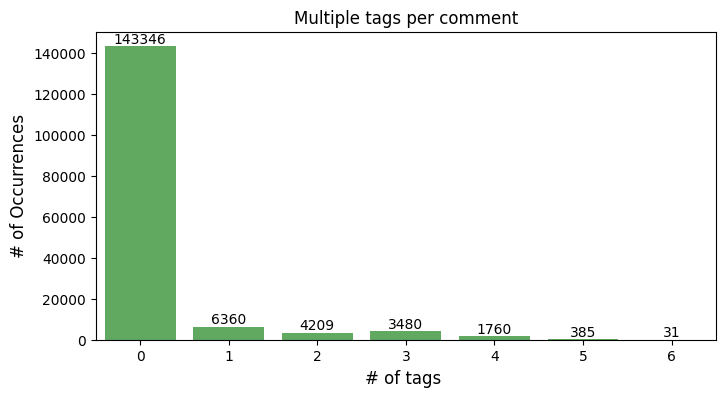

In [26]:
color = sns.color_palette()

x=row_sum.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [29]:
temp_df=train_df.iloc[:,2:-1]

# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
        
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

In [43]:
stopwords = set(stopwords.words('english'))

In [38]:
combined_df = pd.concat([train_df.iloc[:, :2], test_df.iloc[:, :2]], axis=0)
df = combined_df.reset_index(drop=True)

In [41]:
import string

In [44]:
# Indirect Textual Features

# Count sentences based on newline characters in each comment
df['sentence_count'] = df['comment_text'].apply(lambda text: str(text).count('\n') + 1)

# Count total words in each comment
df['word_count'] = df['comment_text'].apply(lambda text: len(str(text).split()))

# Count unique words in each comment
df['unique_word_count'] = df['comment_text'].apply(lambda text: len(set(str(text).split())))

# Count total letters (characters) in each comment
df['letter_count'] = df['comment_text'].apply(lambda text: len(str(text)))

# Count punctuation marks in each comment
df['punctuation_count'] = df['comment_text'].apply(
    lambda text: sum(1 for char in str(text) if char in string.punctuation)
)

# Count uppercase words in each comment
df['uppercase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.isupper())
)

# Count title-case words in each comment
df['titlecase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.istitle())
)

# Count stopwords in each comment
df['stopword_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).lower().split() if word in stopwords)
)

# Calculate average word length in each comment
df['avg_word_length'] = df['comment_text'].apply(
    lambda text: np.mean([len(word) for word in str(text).split()]) if text else 0
)

c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [45]:
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [48]:
# Calculating the percentage of unique words per comment
df['unique_word_ratio'] = (df['unique_word_count'] / df['word_count']) * 100

# Calculating the percentage of punctuation marks per comment
df['punctuation_ratio'] = (df['punctuation_count'] / df['word_count']) * 100


In [ ]:
# Splitting dataset into training and testing feature sets
train_data_features = df[:train_df.shape[0]].reset_index(drop=True)
test_data_features = df[train_df.shape[0]:].reset_index(drop=True)


# Extracting labels from the training data
label_columns = train_df.iloc[:, 2:].reset_index(drop=True)

# Combining training features and labels into a single DataFrame
combined_training_data = pd.concat([train_data_features, label_columns], axis=1)
combined_testing_data = 


In [59]:

print(train_data_features)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [61]:

print(test_data_features.head())

                 id                                       comment_text  \
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  00017563c3f7919a  :If you have a look back at the source, the in...   
4  00017695ad8997eb          I don't anonymously edit articles at all.   

   sentence_count  word_count  unique_word_count  letter_count  \
0               1          72                 61           367   
1               3          12                 11            50   
2               5          12                 10            54   
3               1          38                 30           205   
4               1           7                  7            41   

   punctuation_count  uppercase_word_count  titlecase_word_count  \
0                 12                     0                     4   
1                  6  

In [62]:
print(combined_training_data.head())

                 id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   sentence_count  word_count  unique_word_count  letter_count  \
0               2          43                 41           264   
1               1          17                 17           112   
2               1          42                 39           233   
3               5         113                 82           622   
4               1          13                 13            67   

   punctuation_count  uppercase_word_count  titlecase_word_count  \
0                 10                     2                    11   
1                 12  

In [54]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Apply preprocessing
train_df['clean_comment'] = train_df['comment_text'].apply(preprocess_text)
test_df['clean_comment'] = test_df['comment_text'].apply(preprocess_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=15000, stop_words='english')

X_train_tfidf = tfidf.fit_transform(train_df['clean_comment'])
X_test_tfidf = tfidf.transform(test_df['clean_comment'])